# 📈 Lecture 11 – Data 100, Spring 2025

Data 100, Spring 2025

[Acknowledgments Page](https://ds100.org/sp25/acks/)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## 🦭 Dugongs Part 1: Comparing Two Different Models, Both Fit with MSE

In [10]:
dugongs = pd.read_csv("data/dugongs.csv")
display(dugongs.head())

data_constant = dugongs["Age"]
data_linear = dugongs[["Length", "Age"]]

,Length,Age
0,1.77,1.5
1,1.80,1.0
2,1.85,1.5
3,1.87,1.5
4,2.02,2.5


### 🎢 Loss Surfaces

The average loss of the constant model using L2 loss (i.e., squared loss) is

$$
\Large
\hat{R}(\theta_0) = \frac{1}{n}\sum_{i=1}^n (y_i - \theta_0)^2
$$

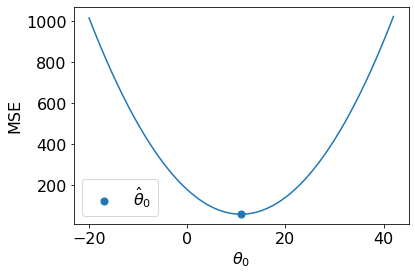

In [11]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

# Calculates the MSE for a constant model given some value of theta
def mse_constant(theta, data):
    return np.mean(np.array([(y_obs - theta) ** 2 for y_obs in data]), axis=0)

# Set up a range of theta values and calculate the MSE for each
thetas = np.linspace(-20, 42, 1000)
l2_loss_thetas = mse_constant(thetas, data_constant)

# Plot the MSE as a function of the thetas
plt.plot(thetas, l2_loss_thetas)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'MSE')

# Optimal point
thetahat = np.mean(data_constant)
plt.scatter([thetahat], [mse_constant(thetahat, data_constant)], s=50, label = r"$\hat{\theta}_0$")
plt.legend()
# plt.savefig('mse_constant_loss.png', bbox_inches = 'tight');
plt.show()

The average loss for the SLR model using L2 loss is the following:

$$
\Large
\hat{R}(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=1}^n (y_i - (\theta_0 + \theta_1x))^2
$$

Note: Unlike the average loss of the constant model, which has one input, the average loss of SLR has two inputs!

In [12]:
# Run this cell to see a 3D visualization of the loss surface
import itertools
import plotly.graph_objects as go

# Calculates the MSE for a linear model given some values of theta_0 and theta_1
def mse_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([(y - (theta_0+theta_1*x)) ** 2 for x, y in zip(data_x, data_y)]), axis=0)

# Set up a grid of theta values and calculate the MSE for each
theta_0_values = np.linspace(-80, 20, 80)
theta_1_values = np.linspace(-10,30, 80)
mse_values = [mse_linear(theta_0, theta_1, data_linear) \
              for theta_0, theta_1 in itertools.product(theta_0_values, theta_1_values)]
mse_values = np.reshape(mse_values, (len(theta_0_values), len(theta_1_values)), order='F')

# Optimal point
data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
theta_1_hat = np.corrcoef(data_x, data_y)[0, 1] * np.std(data_y) / np.std(data_x)
theta_0_hat = np.mean(data_y) - theta_1_hat * np.mean(data_x)
fig_lin = go.Figure(data=[go.Surface(x=theta_0_values, y=theta_1_values, z=mse_values,name='z=MSE')])
fig_lin.add_trace(go.Scatter3d(x=[theta_0_hat], y=[theta_1_hat], \
                               z=[mse_linear(theta_0_hat, theta_1_hat, data_linear)],\
                               mode='markers', marker=dict(size=12),name='theta hat'))

fig_lin.update_layout(
    autosize=False,
    scene = dict(
                    xaxis_title='theta_0',
                    yaxis_title='theta_1',
                    zaxis_title='z=MSE'),
                    width=500,
                    margin=dict(r=20, b=10, l=10, t=10))

fig_lin.show()

### 🧮 Computing the RMSE of SLR and constant model fit with MSE

In [13]:
print("Least Squares Constant Model RMSE:",
          round(np.sqrt(mse_constant(thetahat, data_constant)), 2)
      )
print("Least Squares Linear Model RMSE:  ",
          round(np.sqrt(mse_linear(theta_0_hat, theta_1_hat, data_linear)),2)
      )

Least Squares Constant Model RMSE: 7.72
Least Squares Linear Model RMSE:   4.31


Interpreting the RMSE (Root Mean Square Error):
* Constant model error is HIGHER than linear model error
* Linear model fit is BETTER than constant model fit (if using RMSE as our metric)

### 🔮 Predictions

This plotting code is just for your reference. 

This code generates the figures used in the lecture. 

In [14]:
yobs = data_linear["Age"]      # The true observations y
xs = data_linear["Length"]     # Needed for linear predictions
n = len(yobs)                  # Predictions

yhats_constant = [thetahat for i in range(n)]    # Not used, but food for thought
yhats_linear = [theta_0_hat + theta_1_hat * x for x in xs]

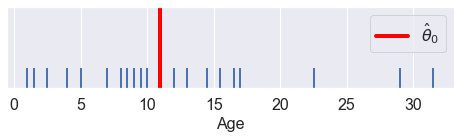

In [15]:
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.axvline(thetahat, color='red', lw=4, label=r"$\hat{\theta}_0$");
plt.legend()
plt.yticks([])
# plt.savefig('dugong_rug.png', bbox_inches = 'tight');
plt.show()

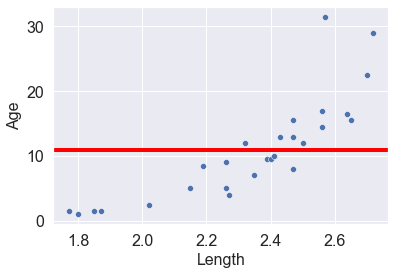

In [ ]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.axhline(y=thetahat, color='red', lw=4)
# plt.savefig('dugong_constant_line.png', bbox_inches = 'tight');
plt.show()

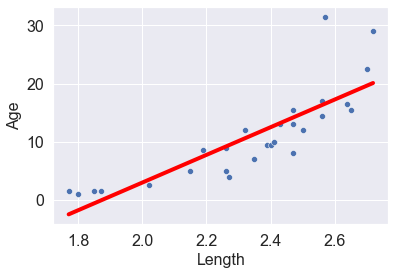

In [ ]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.show()

<br/>

---

## 🧋 Boba Tea:  Two Constant Models, Fit to Different Losses

### Exploring MAE

In [ ]:
boba = np.array([20, 21, 22, 29, 33])

Let's plot the $L_1$ loss for a **single** observation. We'll plot the $L_1$ loss for the first observation; since $y_1 = 20$, we'll be plotting

$$
\Large
L_1(20, \theta_0) = |20 - \theta_0|
$$

In [ ]:
thetas = np.linspace(10, 30, 1000)
l1_loss_single_obvs = np.abs(boba[0] - thetas)

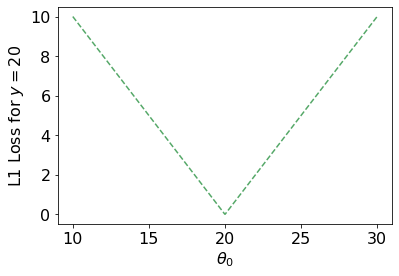

In [ ]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

plt.plot(thetas, l1_loss_single_obvs,  'g--', );
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'L1 Loss for $y = 20$');
# plt.savefig('l1_loss_single_obs.png', bbox_inches = 'tight');

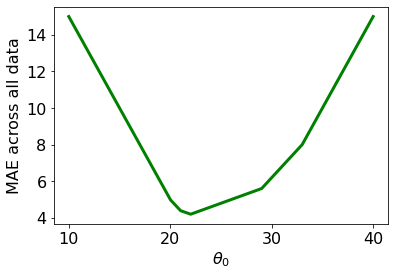

In [ ]:
def mae_constant(theta_0, data):
    return np.mean(np.array([np.abs(y_obs - theta_0) for y_obs in data]), axis=0)

thetas = np.linspace(10, 40, 1000)
l1_loss_thetas = mae_constant(thetas, boba)
plt.plot(thetas, l1_loss_thetas, color = 'green', lw=3);
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'MAE across all data');
# plt.savefig('l1_loss_average.png', bbox_inches = 'tight');

### 🥣 Median Minimizes MAE for the Constant Model


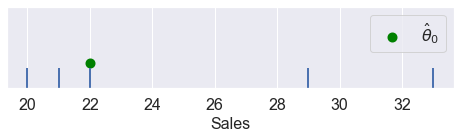

In [ ]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

yobs = boba
thetahat = np.median(yobs)

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.scatter([thetahat], [-.1], color='green', lw=4, label=r"$\hat{\theta}_0$");
plt.xlabel("Sales")
plt.legend()
plt.yticks([])
# plt.savefig('boba_rug.png', bbox_inches = 'tight');
plt.show()

### 2️⃣ Two Constant Models, Fit to Different Losses

In [ ]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

nplots = 2
def plot_losses(data, title=None, theta_range=(10, 40)):
    thetas = np.linspace(theta_range[0], theta_range[1], 1000)
    l2_loss_thetas = mse_constant(thetas, data)
    thetahat_mse = np.mean(data)

    l1_loss_thetas = mae_constant(thetas, data)
    thetahat_mae = np.median(data)

    fig, axs = plt.subplots(1, nplots, figsize=(5*2+0.5, 3.5))
    axs[0].plot(thetas, l2_loss_thetas, lw=3);
    axs[0].scatter([thetahat_mse], [mse_constant(thetahat_mse, data)], s=100)
    axs[0].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mse:.1f}",
                    xy=(thetahat_mse, np.average(axs[0].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[0].set_xlabel(r'$\theta_0$');
    axs[0].set_ylabel(r'MSE');

    axs[1].plot(thetas, l1_loss_thetas, color = 'green', lw=3);
    axs[1].scatter([thetahat_mae], [mae_constant(thetahat_mae, data)], color='green', s=100)
    axs[1].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mae:.1f}",
                    xy=(thetahat_mae, np.average(axs[1].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[1].set_xlabel(r'$\theta_0$');
    axs[1].set_ylabel(r'MAE');
    if title:
        fig.suptitle(title)
    fig.tight_layout()
    return fig

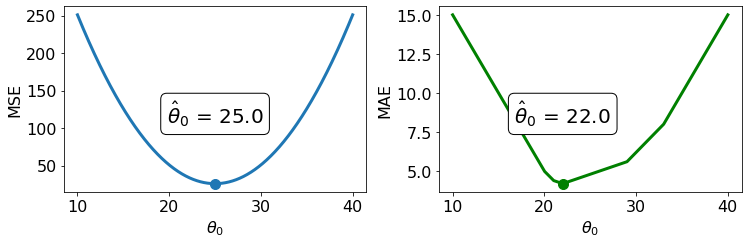

In [ ]:
fig = plot_losses(boba)
plt.figure(fig)
# plt.savefig('loss_compare.png', bbox_inches = 'tight');
plt.show()

#### More loss comparison: Outliers

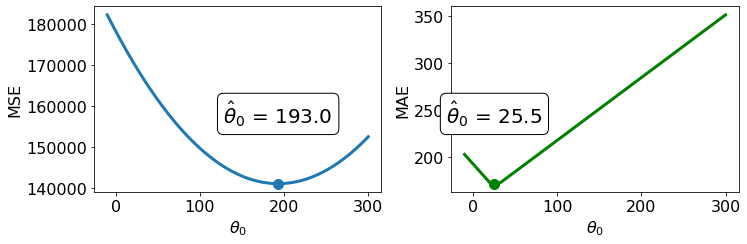

In [ ]:
boba_outlier = np.array([20, 21, 22, 29, 33, 1033])
fig = plot_losses(boba_outlier, theta_range=[-10, 300])
plt.figure(fig)
# plt.savefig('loss_outlier.png', bbox_inches = 'tight');
plt.show()

#### Uniqueness under Different Loss Functions

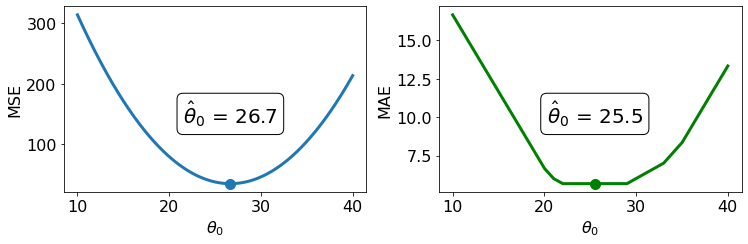

In [ ]:
boba_even = np.array([20, 21, 22, 29, 33, 35])
fig = plot_losses(boba_even)
plt.figure(fig)
#plt.savefig('loss_unique.png', bbox_inches = 'tight');
plt.show()

#### Bonus: MAE loss curve for SLR?

We saw earlier that the MSE (average L2) loss curve for Simple Linear Regression is smooth and parabolic in 3 dimensions. What does the MAE for SLR curve look like?

It's **beyond the scope of this course**, but for the curious, the below cell plots the mean absolute error (average L1 loss) on the boba dataset for a simple linear regression model . I don't plot the minimum because I don't know if there's a closed form solution (you could solve it numerically with techniques you learn in lab).

Since the boba dataset didn't have input, I've arbitrarily used "temperature of that day" as input. I made up the numbers (assume degrees Farenheit).

In [ ]:
boba_df = pd.DataFrame({"sales": [20, 21, 22, 29, 33],
                        "temps": [40, 44, 55, 70, 85]},
                       columns=["temps", "sales"])
boba_df

,temps,sales
0,40,20
1,44,21
2,55,22
3,70,29
4,85,33


In [ ]:
# Just run this cell
import itertools
import plotly.graph_objects as go

data_linear = boba_df

def mAe_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([np.abs(y - (theta_0+theta_1*x)) for x, y in zip(data_x, data_y)]), axis=0)

theta_0_values = np.linspace(-20, 20, 80)
theta_1_values = np.linspace(-50, 50, 80)
mAe_values = [mAe_linear(theta_0, theta_1, data_linear) \
              for theta_0, theta_1 in itertools.product(theta_0_values, theta_1_values)]
mAe_values = np.reshape(mAe_values, (len(theta_0_values), len(theta_1_values)), order='F')

# Optimal point
fig_lin_mae = go.Figure(data=[go.Surface(x=theta_0_values, y=theta_1_values, z=mAe_values,name='z=MAE')])

fig_lin_mae.update_layout(
    autosize=False,
    scene = dict(
                    xaxis_title='x=theta_0',
                    yaxis_title='y=theta_1',
                    zaxis_title='z=MAE'),
                    width=500,
                    margin=dict(r=20, b=10, l=10, t=10))
fig_lin_mae.show()

Now observe the difference between the MAE loss and the MSE loss for one application.

In [ ]:
# Just run this cell

def mSe_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([(y - (theta_0+theta_1*x))**2 for x, y in zip(data_x, data_y)]), axis=0)

theta_0_values = np.linspace(-20, 20, 80)
theta_1_values = np.linspace(-50, 50, 80)
mSe_values = [mSe_linear(theta_0, theta_1, data_linear) \
              for theta_0, theta_1 in itertools.product(theta_0_values, theta_1_values)]
mSe_values = np.reshape(mSe_values, (len(theta_0_values), len(theta_1_values)), order='F')

# Optimal point
fig_lin_mae = go.Figure(data=[go.Surface(x=theta_0_values, y=theta_1_values, z=mSe_values,name='z=MSE')])

fig_lin_mae.update_layout(
    autosize=False,
    scene = dict(
                    xaxis_title='x=theta_0',
                    yaxis_title='y=theta_1',
                    zaxis_title='z=MSE'),
                    width=500,
                    margin=dict(r=20, b=10, l=10, t=10))
fig_lin_mae.show()

## 🦭 Dugongs Part 2

The content in the rest of this notebook will be covered just in slides. 

The code below exists just so you can reproduce the figures in the slides.

### Residual Plot

In [ ]:
dugongs = pd.read_csv("data/dugongs.csv")
dugongs.head()

,Length,Age
0,1.77,1.5
1,1.80,1.0
2,1.85,1.5
3,1.87,1.5
4,2.02,2.5


In [ ]:
yobs = dugongs["Age"]      # The true observations y
xs = dugongs["Length"]     # Needed for linear predictions

theta_1_hat = np.corrcoef(xs, yobs)[0, 1] * np.std(yobs) / np.std(xs)
theta_0_hat = np.mean(yobs) - theta_1_hat * np.mean(xs)
yhats_linear = theta_0_hat + theta_1_hat * xs

In [ ]:
np.corrcoef(xs, yobs)[0, 1]

0.8296474554905716

The correlation coefficient is pretty high...but there's an issue.

Let's first plot the Dugong linear fit again. It doesn't look so bad if we see it here.

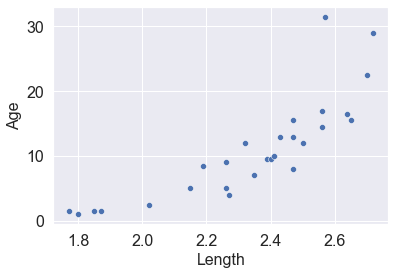

In [ ]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
# plt.savefig('dugong_scatter.pdf', bbox_inches = 'tight');
plt.show()

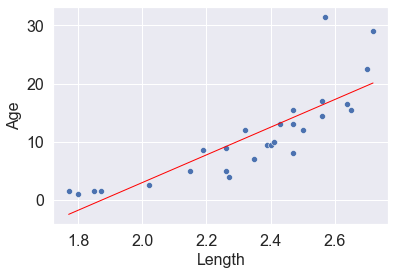

In [ ]:
sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=1)
# plt.savefig('dugong_line.pdf', bbox_inches = 'tight');
plt.show()

Let's further inspect by plotting residuals.

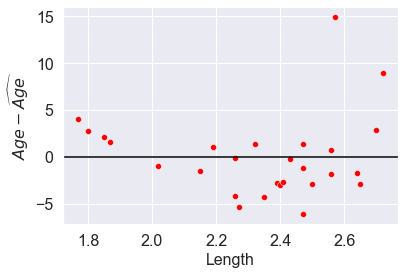

In [ ]:
residuals = yobs - yhats_linear

sns.scatterplot(x=xs, y=residuals, color='red', lw=1)
plt.axhline(0, color='black')
plt.ylabel(r"$Age - \widehat{Age}$")
# plt.savefig('dugong_residuals.pdf', bbox_inches = 'tight');
plt.show()

### Log transformation of y

We could fit a line to the linear model that relates $ z = \log(y)$ to $x$:

$$ 
\Large
\hat{z} = \theta_0 + \theta_1 x
$$

In [ ]:
dugongs["Log(Age)"] = np.log(dugongs["Age"])
zobs = dugongs["Log(Age)"]      # The LOG of true observations y
xs = dugongs["Length"]     # Needed for linear predictions

ztheta_1_hat = np.corrcoef(xs, zobs)[0, 1] * np.std(zobs) / np.std(xs)
ztheta_0_hat = np.mean(zobs) - ztheta_1_hat * np.mean(xs)
zhats_linear = ztheta_0_hat + ztheta_1_hat * xs

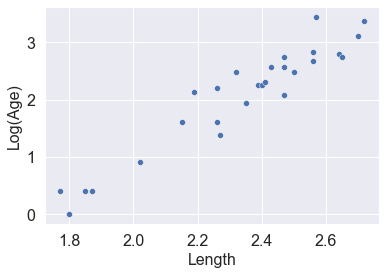

In [ ]:
sns.scatterplot(x=xs, y=zobs)
# plt.savefig('dugong_zscatter.pdf', bbox_inches = 'tight');

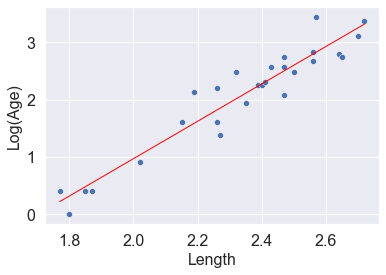

In [ ]:
sns.scatterplot(x=xs, y=zobs)
plt.plot(xs, zhats_linear, color='red', lw=1)
# plt.savefig('dugong_zline.pdf', bbox_inches = 'tight');
plt.show()

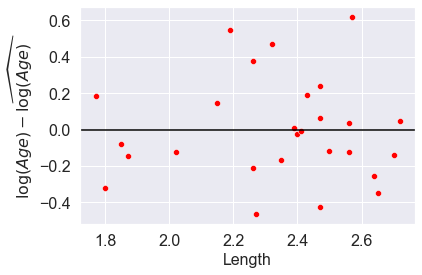

In [ ]:
zresiduals = zobs - zhats_linear

sns.scatterplot(x=xs, y=zresiduals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$\log(Age) - \widehat{\log(Age)}$")
# plt.savefig('dugong_zresiduals.pdf', bbox_inches = 'tight');
plt.show()

### Map back to the original coordinates

$$ 
\begin{align*}
\hat{z} &= \theta_0 + \theta_1 x\\
\widehat{\log(y)}&= \theta_0 + \theta_1 x\\
e^{\widehat{\log(y)}}&= e^{\theta_0 + \theta_1 x}\\
\hat{y}&=e^{\theta_0 + \theta_1 x}\
\end{align*}
$$

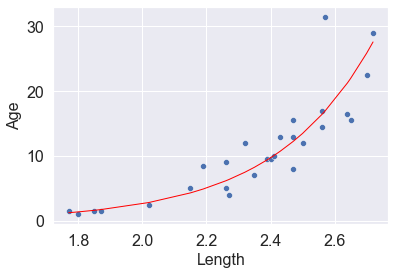

In [ ]:
ypred = np.exp(zhats_linear)
sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, ypred, color='red', lw=1)
# plt.savefig('dugong_zcurve.pdf', bbox_inches = 'tight');
plt.show()

### Squaring transformation of x

We could fit a line to the linear model that relates $y$ to $x^2$:

$$ 
\Large
y = \theta_0 + \theta_1 x^2
$$

**Note: This is a bad way to include a quadratic term. To allow extra flexibility in the quadratic fit, we should model this with multiple regression as $y = \theta_0 + \theta_1 x + \theta_2 x^2$.** So, this section is just for exposition. 

In [ ]:
dugongs["Length^2"] = dugongs["Length"] ** 2
xs = dugongs["Length^2"]   # Needed for linear predictions

quad_theta_1_hat = np.corrcoef(xs, yobs)[0, 1] * np.std(yobs) / np.std(xs)
quad_theta_0_hat = np.mean(yobs) - quad_theta_1_hat * np.mean(xs)
yhats_quad = quad_theta_0_hat + quad_theta_1_hat * xs

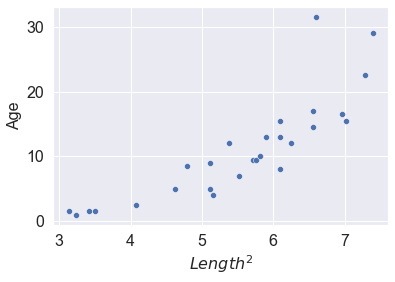

In [ ]:
sns.scatterplot(x=xs, y=yobs)
plt.xlabel(r"$Length^2$")
# plt.savefig('dugong_quad_scatter.pdf', bbox_inches = 'tight');

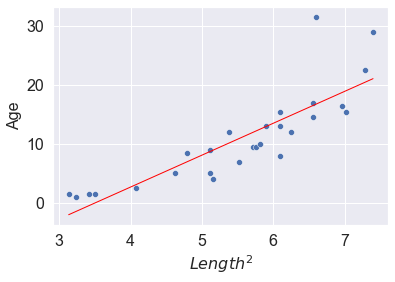

In [ ]:
sns.scatterplot(x=xs, y=yobs)

# Need more granularity or plotted line looks curved
xrange = np.linspace(xs.min(), xs.max(), 1000)
quad_preds_range = quad_theta_0_hat + quad_theta_1_hat * xrange
plt.plot(xrange, quad_preds_range, color='red', lw=1)

plt.xlabel(r"$Length^2$")
# plt.savefig('dugong_quad_line.pdf', bbox_inches = 'tight');
plt.show()

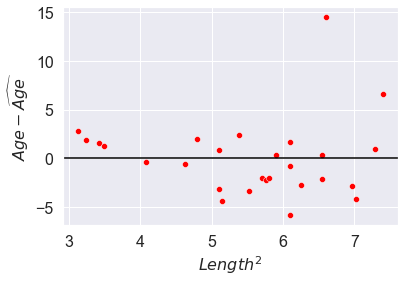

In [ ]:
quad_residuals = yobs - quad_hats_linear

sns.scatterplot(x=xs, y=quad_residuals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$Age - \widehat{Age}$")
plt.xlabel(r"$Length^2$")
# plt.savefig('dugong_quad_residuals.pdf', bbox_inches = 'tight');
plt.show()

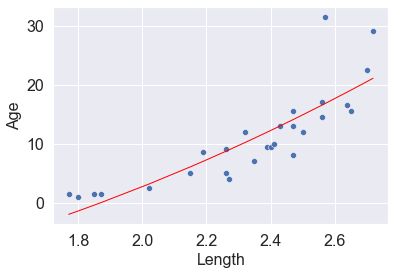

In [ ]:
xs = dugongs["Length"]  
sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_quad, color='red', lw=1)
# plt.savefig('dugong_quad_curve.pdf', bbox_inches = 'tight');
plt.show()